# Analysis of the rental data

Analysis of the rental data already downloded, parsed, and converted to csv. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
CITY_NAME = 'lausanne'

In [3]:
city_path = '../../rental_list/' + CITY_NAME + '/' 
all_rental_data_path = city_path + 'all_rental_data'
combined_data_path = all_rental_data_path + '/combined/rental_all.csv'
df = pd.read_csv(combined_data_path)

In [4]:
df.tail()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
996,5104296,75.0,3.5,flat,"Avenue de Sévelin, 1004 Lausanne, VD",Location d’appartement neuf,NaN,None,en/d/flat-rent-\nlausanne/5104296?s=2&t=1&l=20...
997,5125689,40.0,2.0,flat,"1012 Lausanne, VD",Appartement 2pièces à lausanne 1300.- charges ...,NaN,None,en/d/flat-rent-\nlausanne/5125689?s=2&t=1&l=20...
998,5144165,NaN,1.0,studio,"Rue Caroline 2 - Enning 3, 1003 Lausanne, VD",Sous location à usage de bureau,NaN,None,en/d/studio-rent-\nlausanne/5144165?s=2&t=1&l=...
999,5146045,106.0,3.5,flat,"1004 Lausanne, VD",Au centre ville,NaN,None,en/d/flat-rent-\nlausanne/5146045?s=2&t=1&l=20...
1000,5159698,28.0,1.0,studio,"1018 Lausanne, VD",Studio meublé à louer ecublens,NaN,None,en/d/studio-rent-\nlausanne/5159698?s=2&t=1&l=...


In [5]:
df['Id'].value_counts()[df['Id'].value_counts() > 1]

5170621    2
Name: Id, dtype: int64

## New useful features

In [6]:
# price per room and price per surface area
df['RentPerArea'] = df['Rent'] / df['SurfaceArea']
df['RentPerRoom'] = df['Rent'] / df['NumRooms']
df['AreaPerRoom'] = df['SurfaceArea'] / df['NumRooms']

## Outliers

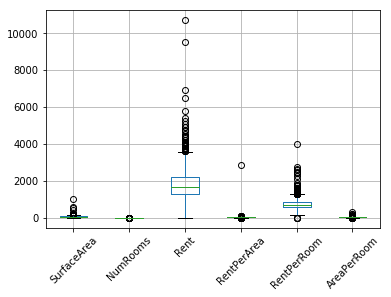

In [7]:
df.drop('Id', axis = 1).boxplot(rot = 45)

In [8]:
def get_whiskers(df, col, WHIS):
    des = df.describe()
    q1 = des[col]['25%']
    q3 = des[col]['75%']
    iqr = q3 - q1
    return [q1 - WHIS * iqr, q3 + WHIS * iqr]

**Surface Area outliers**

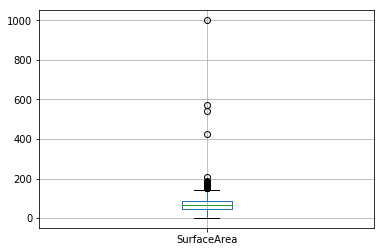

In [9]:
df[['SurfaceArea']].boxplot()

In [10]:
area_whiskers = get_whiskers(df, 'SurfaceArea', WHIS=3.5)  # WHIS value is adjusted based on the manual study of the outliers
area_whiskers

[-95.125, 226.875]

In [11]:
area_outliers = (df['SurfaceArea'] > area_whiskers[1]) | (df['SurfaceArea'] < area_whiskers[0])
area_outliers.sum() # how many area outliers?

4

In [12]:
df[area_outliers]

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom
394,5138995,572.0,3.0,flat,"Chemin de Contigny 9, 1007 Lausanne, VD","Apartment a Lausanne (3 pieces, renove en 2016)",1560.0,None,en/d/flat-rent-\nlausanne/5138995?s=2&t=1&l=20...,2.727273,520.000000,190.666667
716,4984514,423.0,11.0,flat,"Chemin de Praz-Buchilly 103, 1000 Lausanne, VD",En bordure de Golf - Luxueux attique avec terr...,9500.0,None,en/d/flat-rent-\nlausanne/4984514?s=2&t=1&l=20...,22.458629,863.636364,38.454545
717,5141933,540.0,11.0,flat,"1000 Lausanne, VD",Superbe duplex de 11 pièces à louer !,10700.0,None,en/d/flat-rent-\nlausanne/5141933?s=2&t=1&l=20...,19.814815,972.727273,49.090909
762,5124217,1000.0,3.0,single-room,"foret 4b, 1018 Lausanne, VD",Colocation dans un 3 pieces Lausanne,1000.0,None,en/d/single-room-rent-\nlausanne/5124217?s=2&t...,1.000000,333.333333,333.333333


Looking at the above data, it looks like that we can capture the outliers by RentPerArea rather than area itself. 

**Rent per Area Outliers**:

In [13]:
rentPerArea_whiskers = get_whiskers(df, 'RentPerArea', WHIS=1.5)
rentPerArea_whiskers

[12.088045214664676, 45.49378795824181]

I adjust these values manually, as it seems that having a price greater than ~45 is not unusual for rooms for example. 

In [14]:
# manual adjustment
rentPerArea_whiskers = [15, 80]

In [15]:
rentPerArea_outliers = (df['RentPerArea'] > rentPerArea_whiskers[1]) | (df['RentPerArea'] < rentPerArea_whiskers[0])
print(rentPerArea_outliers.sum())
df[rentPerArea_outliers].head()

38


,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom
60,5192788,60.0,2.5,single-room,"0754128612, 1018 Lausanne, VD",Chambre à louer 10m2,500.0,New,/en/d/single-room-rent-lausanne/5192788?s=2&t=...,8.333333,200.0,24.0
67,5189465,90.0,NaN,flat,"1004 Lausanne, VD",Jolie chambre à louer à Lausanne,800.0,NaN,/en/d/flat-rent-lausanne/5189465?s=2&t=1&l=202...,8.888889,NaN,NaN
68,5182648,65.0,NaN,single-room,"1007 Lausanne, VD",Chambre à louer 850CHF,850.0,NaN,/en/d/single-room-rent-lausanne/5182648?s=2&t=...,13.076923,NaN,NaN
72,5187951,90.0,NaN,single-room,"Rte de la Clochatte 10A, 1018 Lausanne, VDClos...",Chambre à louerCherche colocataire/trice fun p...,900.0,## «Cherche colocataire/trice fun pour appart ...,/en/d/single-room-rent-lausanne/5187951?s=2&t=...,10.000000,NaN,NaN
74,5192845,70.0,2.0,flat,"1012 Lausanne, VD",Chambre à louer au centre ville de lausanne (1...,950.0,New,/en/d/flat-rent-1005 lausanne)»lausanne/519284...,13.571429,475.0,35.0


### What are the sources of outliers? 

The source of outliers here is mostely human mistake. Either numbers are entered in wrong fields or the price is for a week (from the description for example) or the price is for a room but total number of rooms is entered. Have a look at the examples below:

In [16]:
df['Description'][74]

'Chambre à louer au centre ville de lausanne (1005 lausanne)'

In [17]:
df['Description'][635]

'Idéal pour famille, faites de ce 4.5 pièces votre chez-vous!'

We will be removing the outliers, that appeared above; manually checking, most of them involve some sort of human error. We could make this removal of outliers more accurate, for instance by looking at the description field and looking for phrases such as "per room" or "per week" (in English or French, for example). 

### Remove outliers

In [18]:
# Remove Rent per Area outliers
df = df.drop(df[rentPerArea_outliers].index).reset_index()

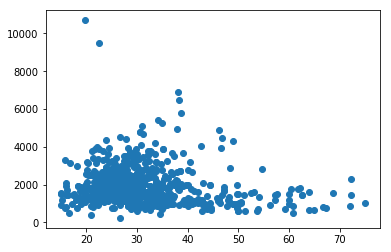

In [19]:
plt.scatter(x = df['RentPerArea'], y = df['Rent'])

In [20]:
#df.drop((df[(df['RentPerArea'] > 2000)].index), axis = 0, inplace=True)

#df.reset_index(inplace=True)

## Some statistical info

In [21]:
stats = df.describe()
stats

,index,Id,SurfaceArea,NumRooms,Rent,RentPerArea,RentPerRoom,AreaPerRoom
count,963.000000,9.630000e+02,846.000000,932.000000,952.000000,837.000000,922.000000,821.000000
mean,503.044652,5.094833e+06,68.043735,2.729077,1880.243697,30.636424,756.376113,26.168847
std,288.876883,2.034082e+05,38.761528,1.242741,927.399409,9.128938,321.283741,11.466871
min,0.000000,1.806661e+06,8.000000,1.000000,1.000000,15.000000,0.500000,2.857143
25%,258.500000,5.104314e+06,45.000000,2.000000,1330.000000,25.333333,576.666667,21.333333
50%,504.000000,5.148760e+06,63.000000,2.500000,1696.500000,28.676471,680.000000,24.000000
75%,753.000000,5.173666e+06,85.000000,3.500000,2241.250000,33.269231,859.285714,28.000000
max,1000.000000,5.194735e+06,540.000000,11.000000,10700.000000,75.000000,3990.000000,180.000000


In [22]:
stats['Rent']['mean']

1880.2436974789916

In [23]:
stats.Rent

count      952.000000
mean      1880.243697
std        927.399409
min          1.000000
25%       1330.000000
50%       1696.500000
75%       2241.250000
max      10700.000000
Name: Rent, dtype: float64

In [24]:
print("The mean rental price in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['Rent']['mean']))

The mean rental price in Lausanne is 1880.2 CHF per month.


In [25]:
print("The mean rental price per room in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerRoom']['mean']))

The mean rental price per room in Lausanne is 756.38 CHF per month.


In [26]:
print("The mean rental price per meter square in {} is {:0.5} CHF per month.".format(CITY_NAME.capitalize(), stats['RentPerArea']['mean']))

The mean rental price per meter square in Lausanne is 30.636 CHF per month.


## Rent and Zip Code

### Extract Zip Code from Address

In [27]:
CITY_NAME_C = CITY_NAME.capitalize()

In [28]:
def Extract_zip_code(address):
    n = len(address)
    l = len("Lausanne, VD")
    return int(address[-l - 5: - l -1])

In [29]:
(df[df['Id'].index == 337]).index

Int64Index([337], dtype='int64')

In [30]:
for i in range(0, df.shape[0]):
    address = df['Address'][i]
    Extract_zip_code(address)

In [31]:
df['ZipCode'] = df['Address'].map(lambda x: Extract_zip_code(x))

In [32]:
df.head(2)

,index,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,RentPerArea,RentPerRoom,AreaPerRoom,ZipCode
0,0,5188930,95.0,3.5,flat,"Rue du Midi 9, 1003 Lausanne, VD",Appartement 3.5 pièces Lausanne avec vue lac,4450.0,New,/en/d/flat-rent-lausanne/5188930?s=2&t=1&l=202...,46.842105,1271.428571,27.142857,1003
1,1,5193795,NaN,NaN,studio,"Chemin de Chissiez 7, 1006 Lausanne, VD",Studio idéalement situé à Lausanne.,720.0,New,/en/d/studio-rent-lausanne/5193795?s=2&t=1&l=2...,NaN,NaN,NaN,1006


In [33]:
zipVsRentMean = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom', 'SurfaceArea']]\
                .groupby(['ZipCode'], as_index = False).mean()

In [34]:
zipVsRentCount = df[['ZipCode', 'RentPerArea', 'RentPerRoom', 'AreaPerRoom']].groupby(['ZipCode'], as_index = False).count()

In [35]:
zipVsRentMean

,ZipCode,RentPerArea,RentPerRoom,AreaPerRoom,SurfaceArea
0,1000,28.330068,746.244089,26.711724,137.916667
1,1003,34.293312,982.985798,30.431693,78.960526
2,1004,29.376036,706.633107,25.484670,66.217573
3,1005,29.771526,717.549115,24.759971,72.230769
4,1006,33.138026,796.651672,26.519910,59.402597
5,1007,32.662661,781.276126,26.217638,59.725275
6,1010,29.250118,735.244557,26.540932,75.971429
7,1012,30.575095,800.437470,27.239348,72.290323
8,1015,NaN,650.000000,NaN,NaN
9,1018,29.193344,674.036497,24.189020,58.172727


In [36]:
import seaborn as sns

In [37]:
dftmp = df[(df['ZipCode'] != 1000) & (df['ZipCode'] != 1015)]

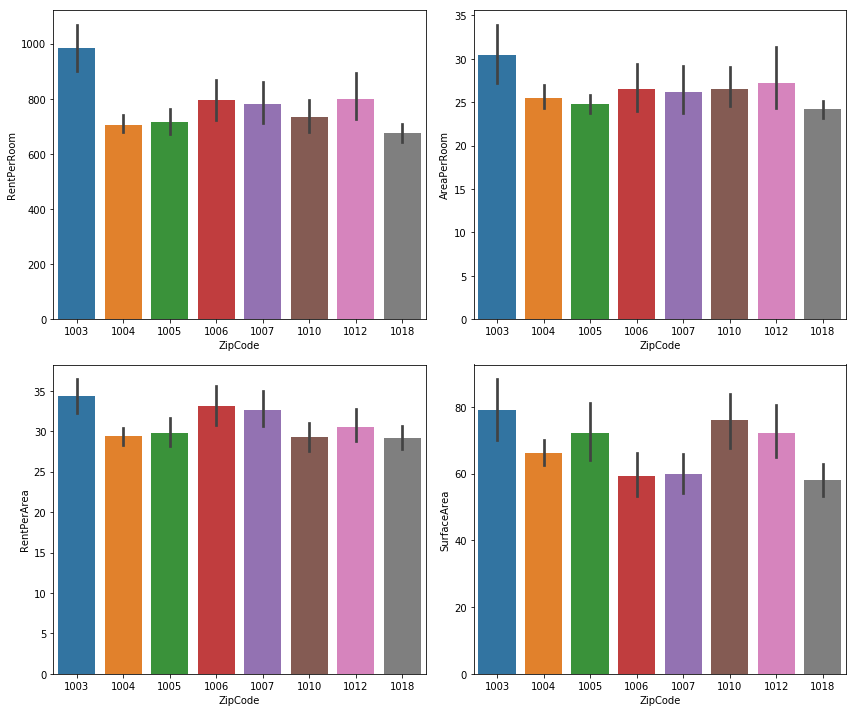

In [38]:
f, ax = plt.subplots(2, 2, figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = 'ZipCode', y = 'RentPerRoom', data = dftmp)
plt.subplot(2, 2, 2)
sns.barplot(x = 'ZipCode', y = 'AreaPerRoom', data = dftmp)
plt.subplot(2, 2, 3)
sns.barplot(x = 'ZipCode', y = 'RentPerArea', data = dftmp)
plt.subplot(2, 2, 4)
sns.barplot(x = 'ZipCode', y = 'SurfaceArea', data = dftmp)
plt.tight_layout()